<a href="https://colab.research.google.com/github/manchann/security_project/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import OneClassSVM

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/BigData/04_hashed.csv')

In [4]:
data.head()

,Rdate,src_ip,dst_ip,Proto,src_port,dst_port,Action,src_country,dst_country
0,2.021041e+13,154.58.159.102,103.177.12.42,6,52897,445,2,None,US
1,2.021041e+13,154.58.159.20,125.66.92.196,6,60579,445,2,None,DE
2,2.021041e+13,154.58.159.164,117.121.178.223,6,63831,445,2,None,US
3,2.021041e+13,154.58.159.165,205.34.95.97,6,55241,445,2,None,US
4,2.021041e+13,154.58.159.102,93.56.164.131,6,52898,445,2,None,US


In [5]:
# def preprocess_pycountry(x):
#     if x == 'None':
#         return x.replace(x,0)
#     else:
#         return x.replace(x,str(len(pycountry.subdivisions.get(country_code=x)))

In [6]:
data.head()

,Rdate,src_ip,dst_ip,Proto,src_port,dst_port,Action,src_country,dst_country
0,2.021041e+13,154.58.159.102,103.177.12.42,6,52897,445,2,None,US
1,2.021041e+13,154.58.159.20,125.66.92.196,6,60579,445,2,None,DE
2,2.021041e+13,154.58.159.164,117.121.178.223,6,63831,445,2,None,US
3,2.021041e+13,154.58.159.165,205.34.95.97,6,55241,445,2,None,US
4,2.021041e+13,154.58.159.102,93.56.164.131,6,52898,445,2,None,US


In [7]:
import datetime
data.tail(20)
print(data.loc[0]['Rdate'])
print(data.loc[5820309]['Rdate'])
total_time = data.loc[5820309]['Rdate'] - data.loc[0]['Rdate']
datetime.datetime.fromtimestamp(total_time/1000)
start_time = 20210410000000


20210410000018.64
20210411235934.81


In [8]:
to_hours = 10000
get_days = 1000000
print(len(data))

print(int((data.loc[0]['Rdate'] - start_time) / get_days))
print((data.loc[0]['Rdate'] - start_time) / to_hours)
print(int((data.loc[5820309]['Rdate'] - start_time) / get_days))
print(((data.loc[5820309]['Rdate'] - start_time) / to_hours) - 100)

distince = 6
x_axis = [time * distince for time in range(0,8)]
print(x_axis)

x_value = []

for x in x_axis:
    filter_a = data['Rdate'] > x
    filter_b = data['Rdate'] > (x + distince)
    d = data[filter_a & filter_b]
    x_value.append(d)


5820310
0
0.0018640625
1
23.593480859375006
[0, 6, 12, 18, 24, 30, 36, 42]


In [9]:
data['Rdate'] = [(d - start_time) / to_hours if int((d -start_time) / get_days) < 1 else ((d-start_time) / to_hours) - 100 + 24 for d in data['Rdate']]


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


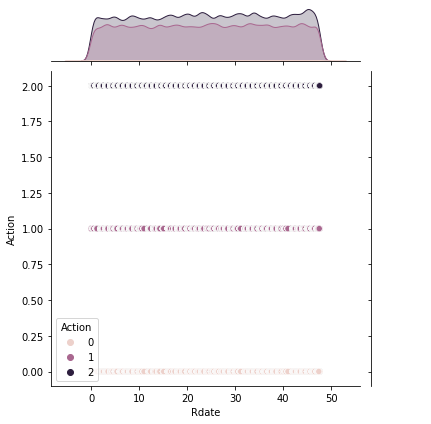

In [10]:
test_data = data
sns.jointplot(data=test_data, x=data['Rdate'],y=data['Action'],hue='Action')
# plt.bar(data['Rdate'],data['src_ip'])
# plt.xticks(x,x_axis)
plt.show()

In [11]:
test_data = data
sns.jointplot(data=test_data, x=data['Rdate'],y=data['src_ip'],hue='Action')
# plt.bar(data['Rdate'],data['src_ip'])
# plt.xticks(x,x_axis)
plt.show()

TypeError: ignored

Error in callback <function flush_figures at 0x7efdff25f170> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
test_data = data
sns.jointplot(data=test_data, x=data['Rdate'],y=data['dst_country'],hue='Action')
# plt.bar(data['Rdate'],data['src_ip'])
# plt.xticks(x,x_axis)
plt.show()

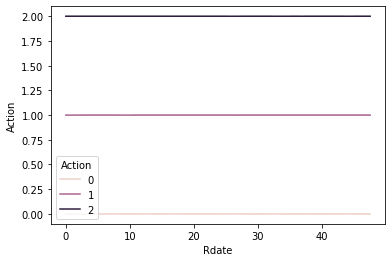

In [12]:
test_data = data
sns.lineplot(data=test_data, x=data['Rdate'], y=data['Action'], hue='Action')